In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data
company_list = []
for stock in tech_list:
    data = yf.download(stock, start, end)
    data['company_name'] = stock
    company_list.append(data)

# Combine the dataframes
df = pd.concat(company_list, axis=0)

# Print the last 10 rows of the combined dataframe
print(df.tail(10))

# Calculate statistics for AAPL stock
AAPL = df[df['company_name'] == 'AAPL']
print(AAPL.describe())




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-19  118.160004  118.309998  115.699997  116.250000  116.250000   
2023-05-22  116.769997  116.769997  114.250000  115.010002  115.010002   
2023-05-23  114.269997  117.139999  113.779999  114.989998  114.989998   
2023-05-24  115.349998  117.339996  115.019997  116.750000  116.750000   
2023-05-25  116.629997  116.870003  114.309998  115.000000  115.000000   
2023-05-26  116.040001  121.500000  116.019997  120.110001  120.110001   
2023-05-30  122.370003  122.919998  119.860001  121.660004  121.660004   
2023-05-31  121.449997  122.040001  119.169998  120.580002

In [11]:
# Calculate statistics for AAPL stock
AAPL = df[df['company_name'] == 'AAPL']
print(AAPL.describe())
GOOG = df[df['company_name'] == 'GOOG']
print(GOOG.describe())
MSFT = df[df['company_name'] == 'MSFT']
print(MSFT.describe())
AMZN = df[df['company_name'] == 'AMZN']
print(AMZN.describe())




             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   151.665441  153.564600  150.055080  151.925920  151.436716   
std     12.637145   12.414989   12.912570   12.735195   12.808339   
min    126.010002  127.769997  124.169998  125.019997  124.656982   
25%    142.699997  144.592503  140.917496  142.912502  142.261517   
50%    150.180000  152.330002  148.485001  150.795006  150.332169   
75%    161.235004  162.814995  160.015003  161.899998  161.320251   
max    181.029999  181.779999  179.259995  180.949997  180.949997   

             Volume  
count  2.500000e+02  
mean   7.388613e+07  
std    2.239948e+07  
min    3.519590e+07  
25%    5.784518e+07  
50%    7.018920e+07  
75%    8.336160e+07  
max    1.647624e+08  
             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   103.818627  105.385234  102.614698 

In [6]:
print(AAPL.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-06 to 2023-06-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None


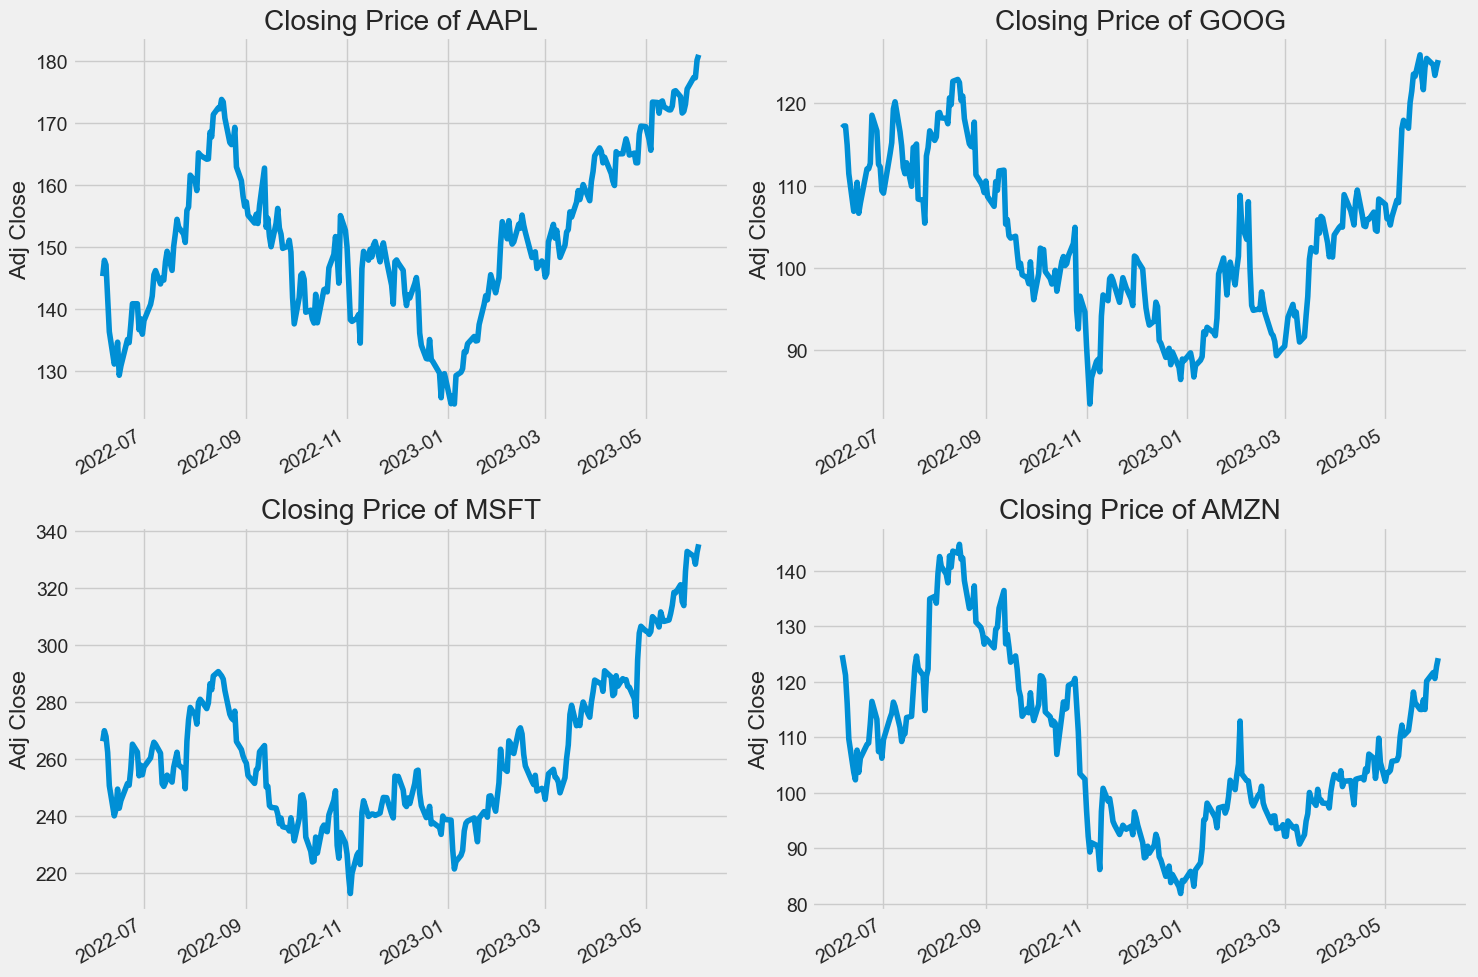

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

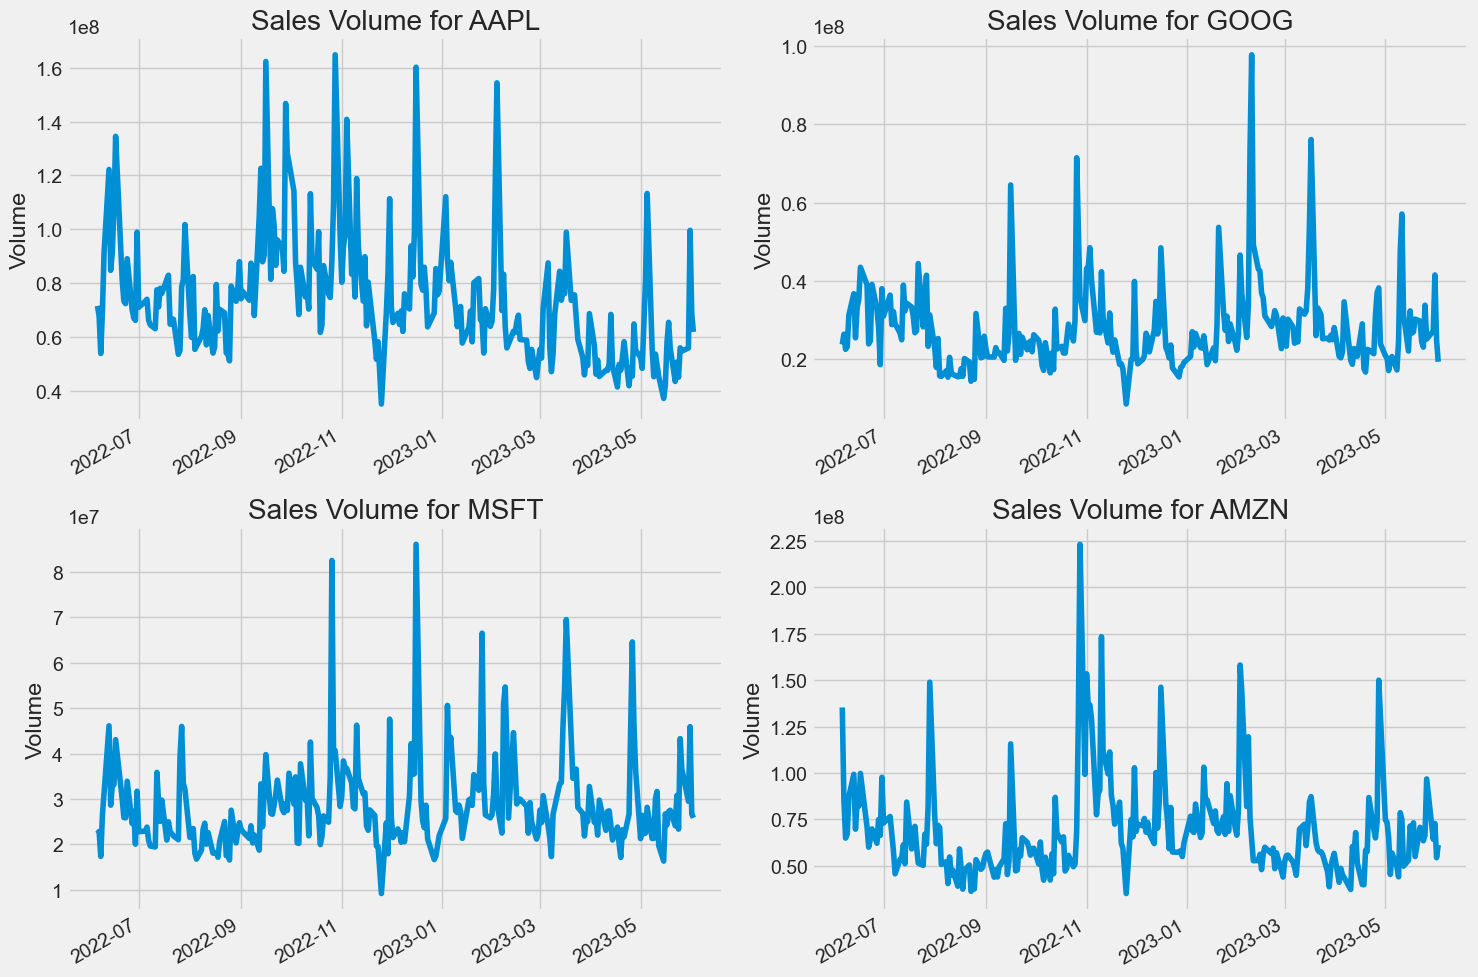

In [8]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

C:\Users\user\AppData\Local\Temp\ipykernel_6536\3579142138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['MA for 10 days'] = AAPL['Adj Close'].rolling(window=10).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_6536\3579142138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['MA for 20 days'] = AAPL['Adj Close'].rolling(window=20).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_6536\3579142138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

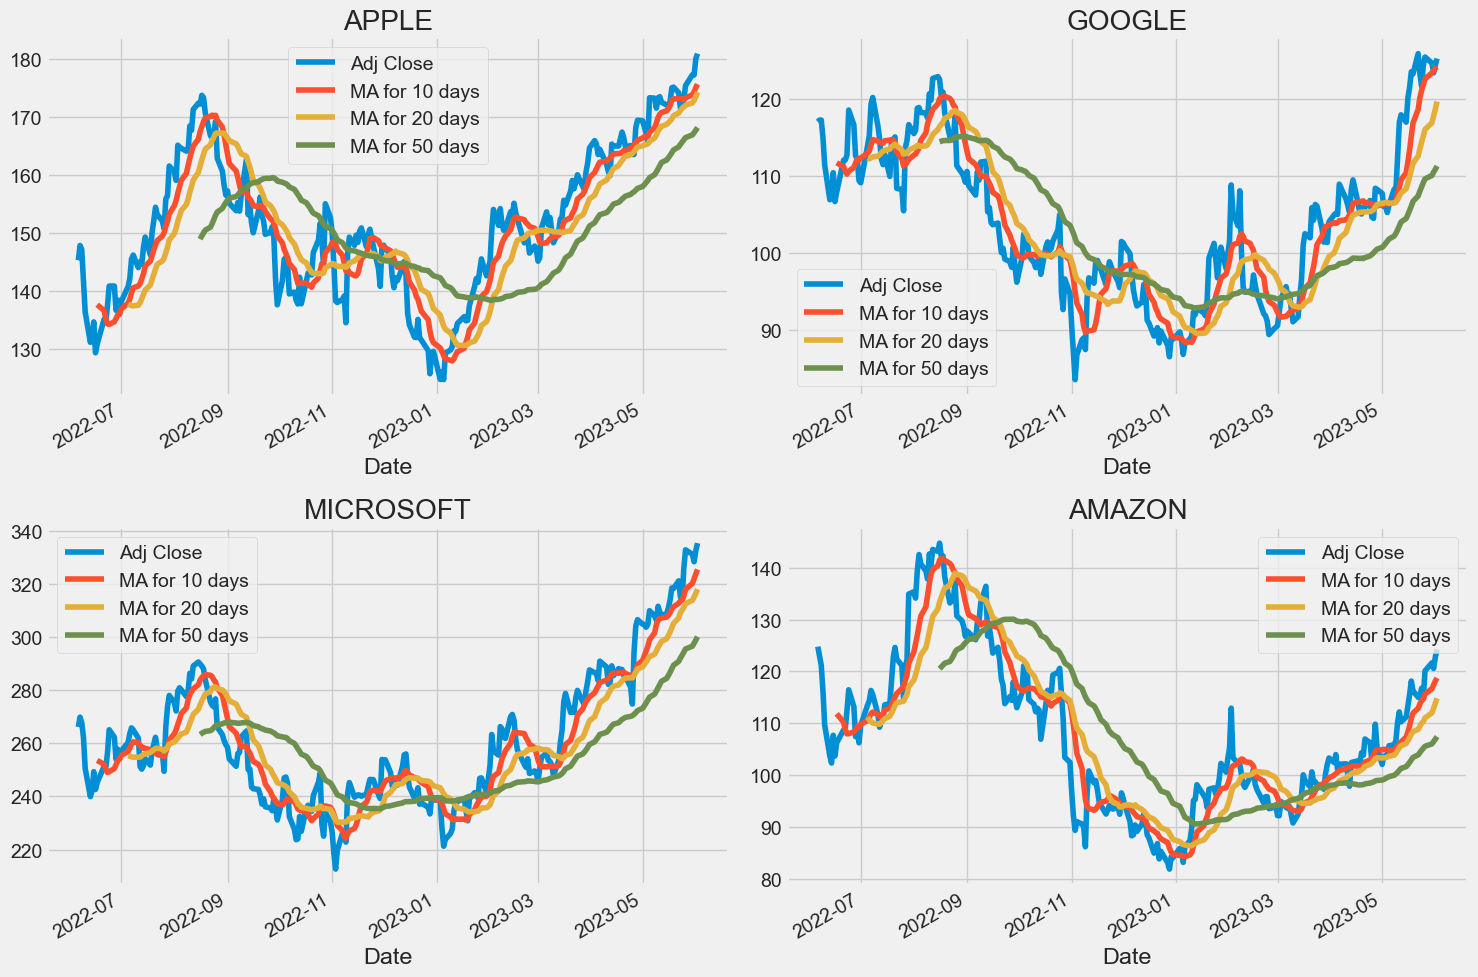

In [13]:
# Calculate moving averages for each stock
AAPL['MA for 10 days'] = AAPL['Adj Close'].rolling(window=10).mean()
AAPL['MA for 20 days'] = AAPL['Adj Close'].rolling(window=20).mean()
AAPL['MA for 50 days'] = AAPL['Adj Close'].rolling(window=50).mean()

GOOG['MA for 10 days'] = GOOG['Adj Close'].rolling(window=10).mean()
GOOG['MA for 20 days'] = GOOG['Adj Close'].rolling(window=20).mean()
GOOG['MA for 50 days'] = GOOG['Adj Close'].rolling(window=50).mean()

MSFT['MA for 10 days'] = MSFT['Adj Close'].rolling(window=10).mean()
MSFT['MA for 20 days'] = MSFT['Adj Close'].rolling(window=20).mean()
MSFT['MA for 50 days'] = MSFT['Adj Close'].rolling(window=50).mean()

AMZN['MA for 10 days'] = AMZN['Adj Close'].rolling(window=10).mean()
AMZN['MA for 20 days'] = AMZN['Adj Close'].rolling(window=20).mean()
AMZN['MA for 50 days'] = AMZN['Adj Close'].rolling(window=50).mean()

# Plot the stock data and moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6536\1299388941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
C:\Users\user\AppData\Local\Temp\ipykernel_6536\1299388941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
C:\Users\user\AppData\Local\Temp\ipykernel_6536\1299388941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

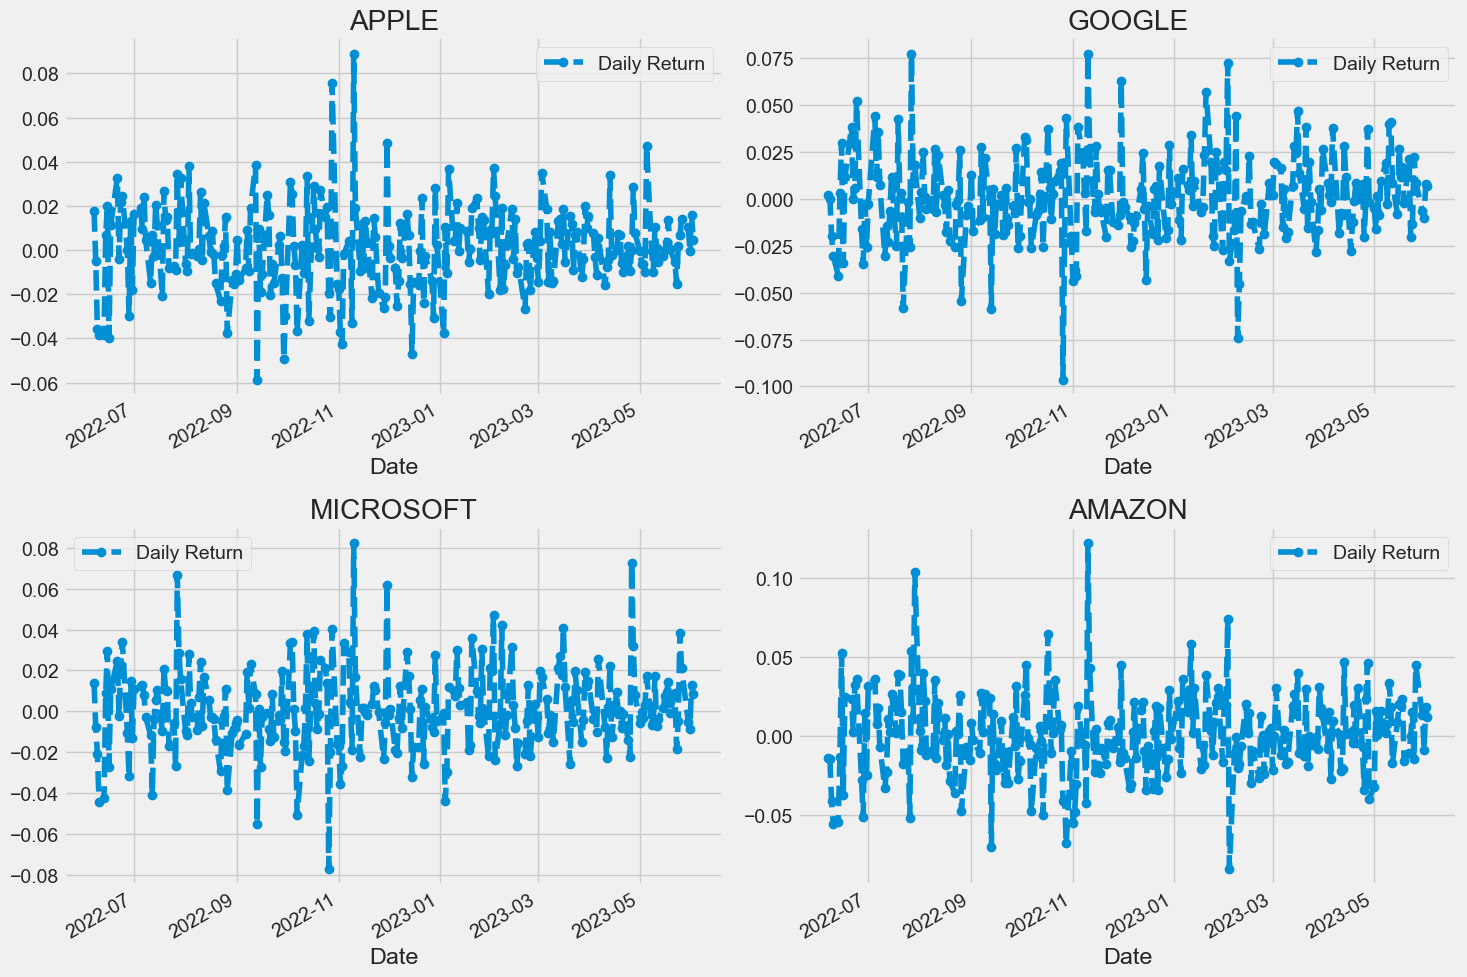

In [15]:

# We'll use pct_change to find the percent change for each day
# Calculate daily returns for each stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

# Plot the daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


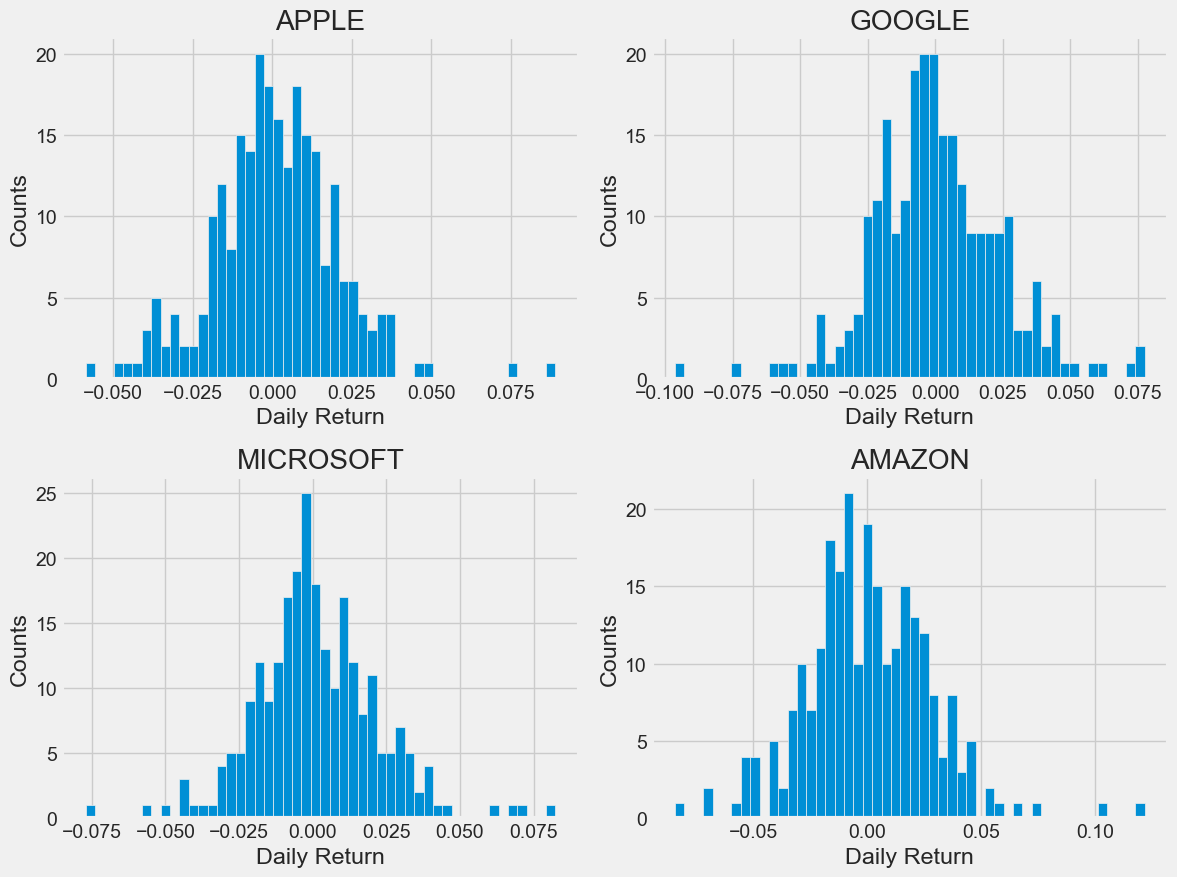

In [17]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()
plt.show()


In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame
import yfinance as yf
import pandas as pd
import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.datetime.now()
start = datetime.datetime(end.year - 1, end.month, end.day)

closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-06-06,NaN,NaN,NaN,NaN
2022-06-07,0.017586,-0.014344,0.001872,0.013953
2022-06-08,-0.005043,-0.014797,0.000073,-0.007670
2022-06-09,-0.035956,-0.041508,-0.019789,-0.020783
2022-06-10,-0.038629,-0.055962,-0.030374,-0.044564


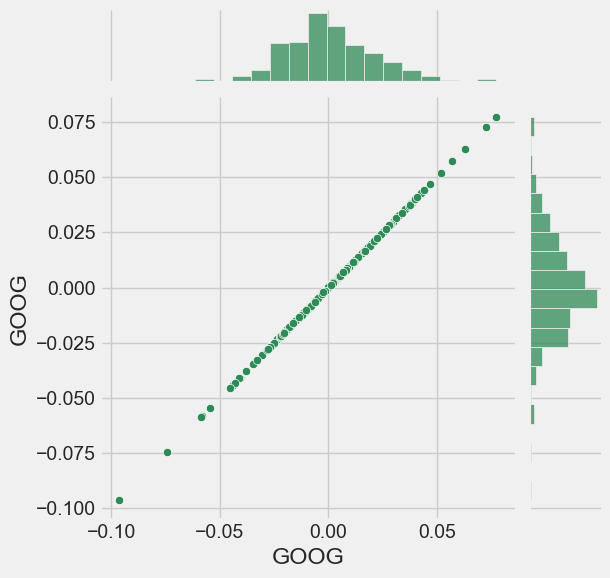

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

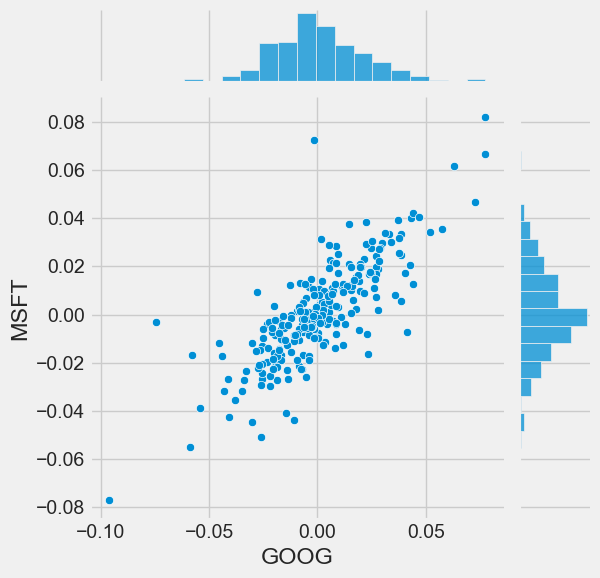

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

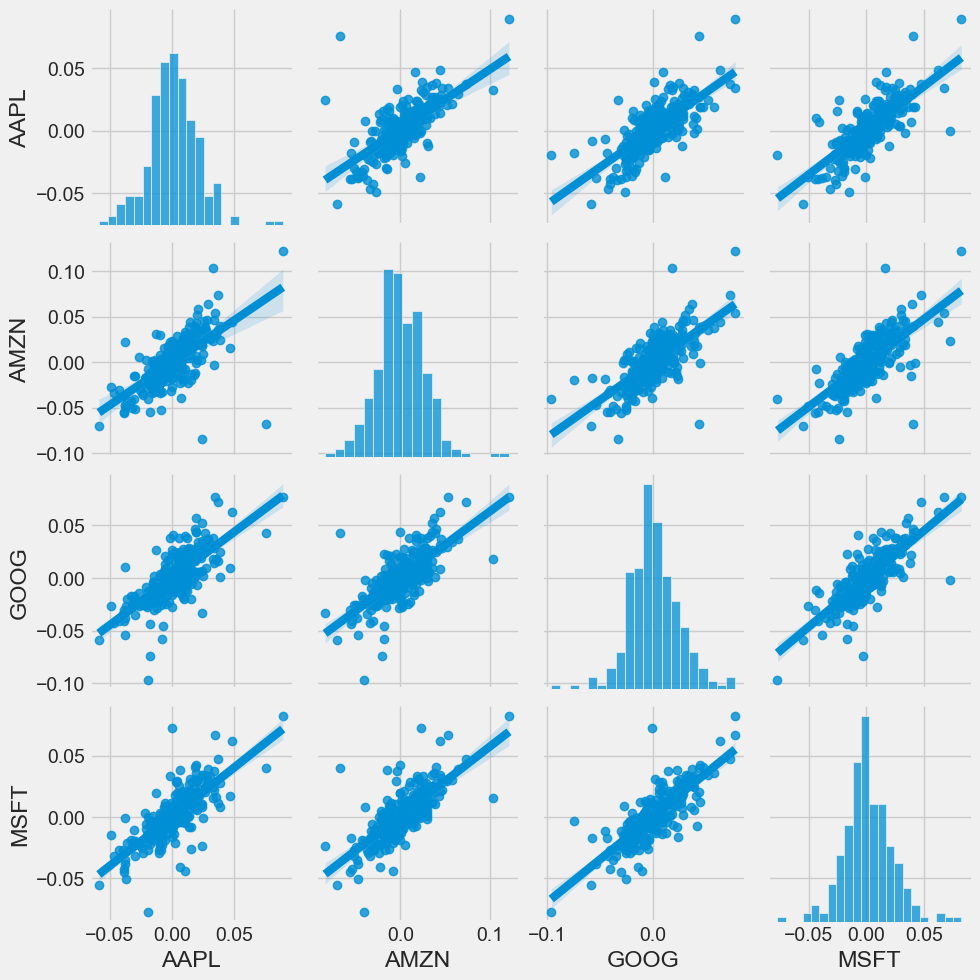

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

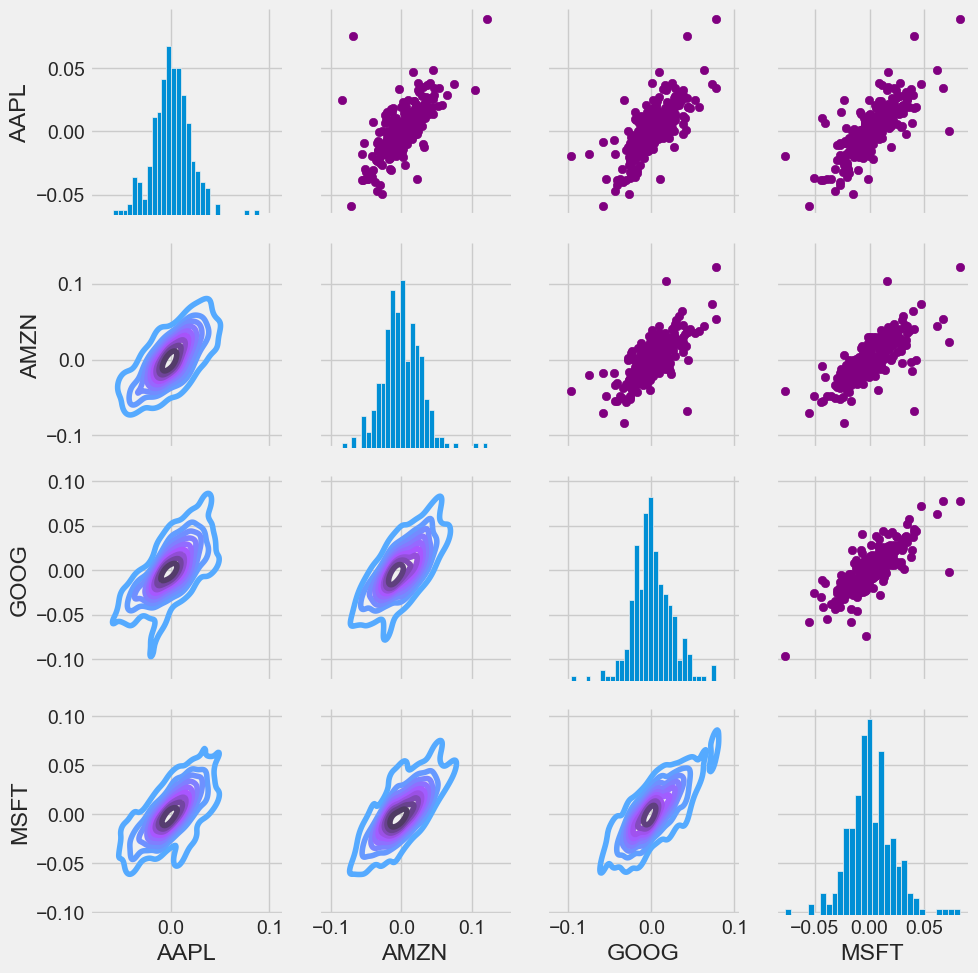

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

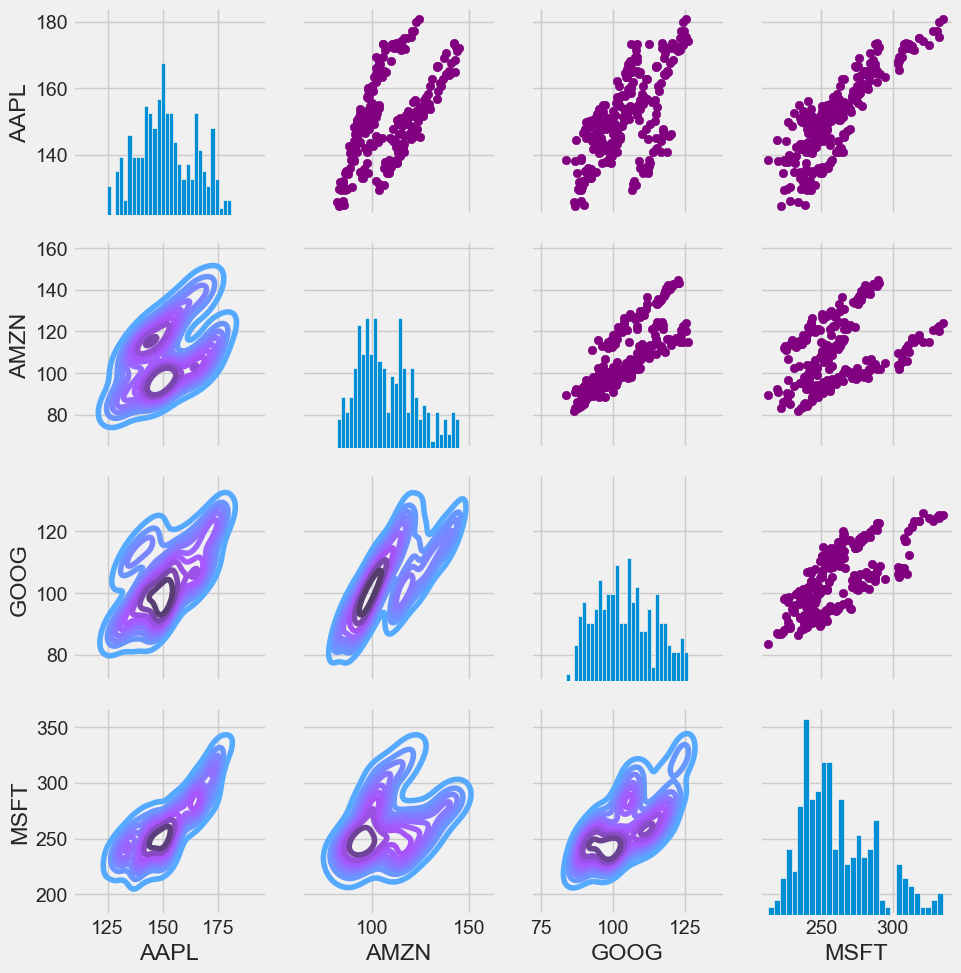

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

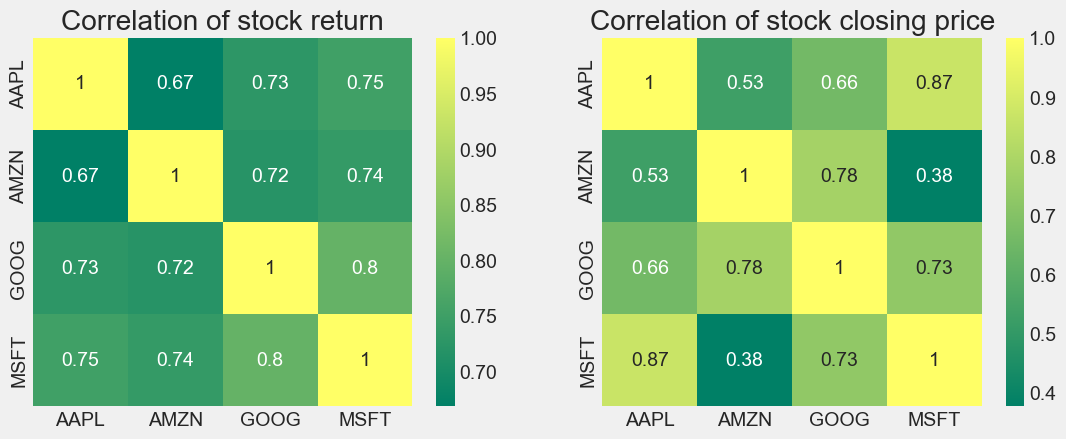

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

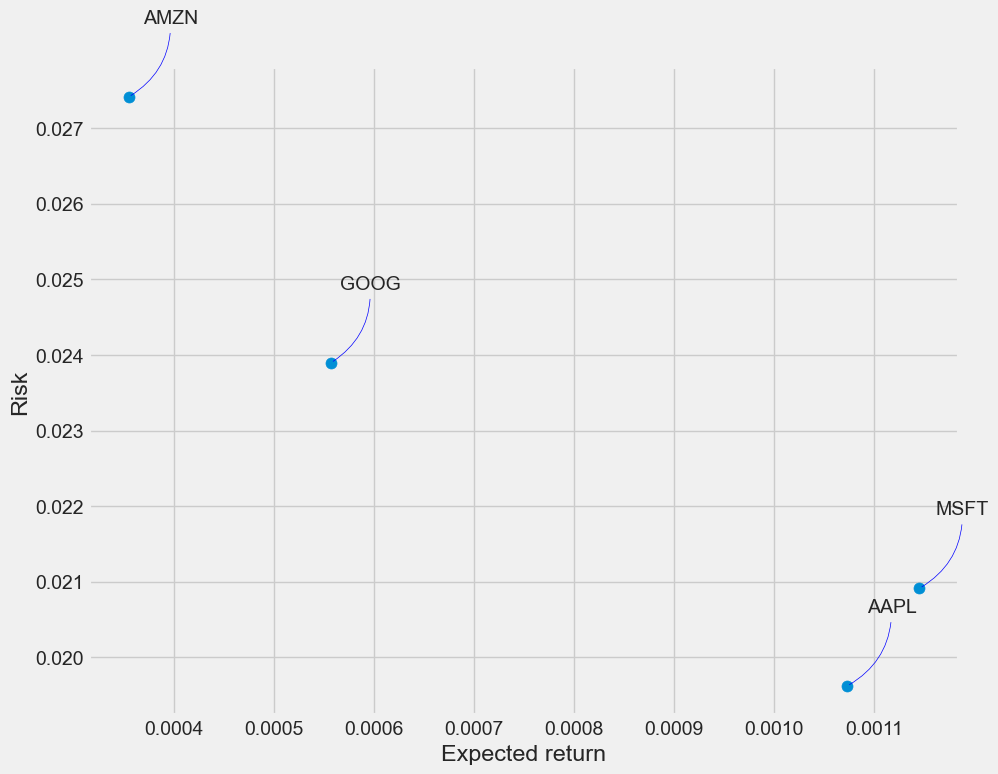

In [28]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [2]:
import yfinance as yf
import datetime

# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.datetime.now())
# Show the data
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550007,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54835000
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300


[*********************100%***********************]  1 of 1 completed


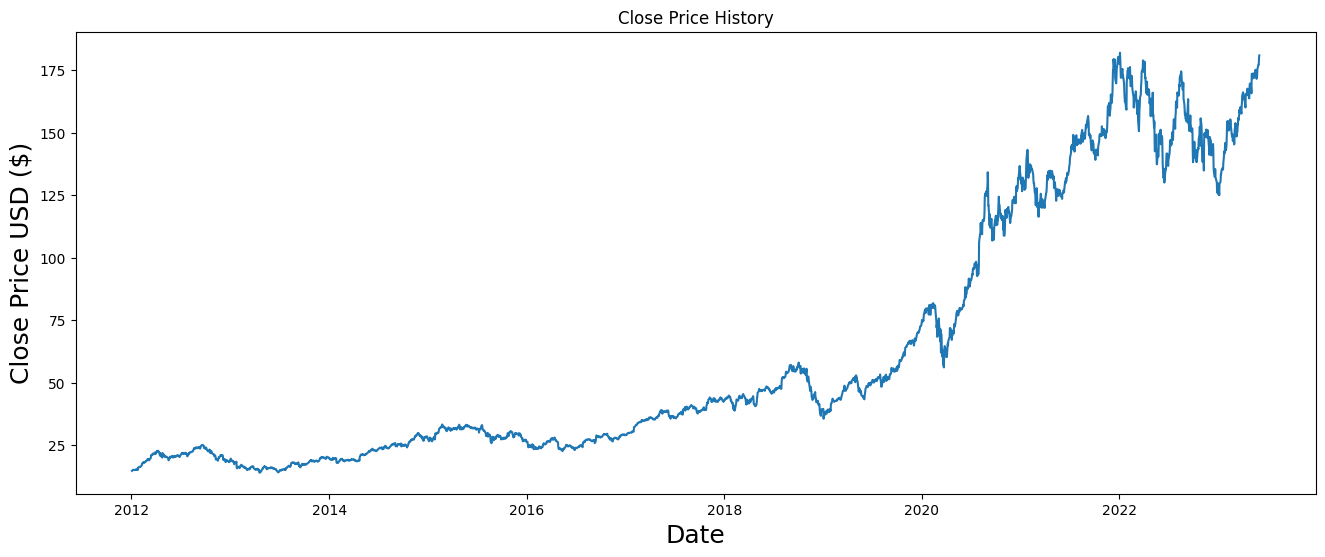

In [4]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.datetime.now())

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np

# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.datetime.now())

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len


[*********************100%***********************]  1 of 1 completed


2730

In [1]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.datetime.now())

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


[*********************100%***********************]  1 of 1 completed


array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.97167724],
       [0.98857569],
       [0.99369284]])

In [3]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(len(scaled_data) * 0.95), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [8]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Get the stock quote
symbol = "AAPL"
start_date = "2012-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
df = yf.download(symbol, start=start_date, end=end_date)

# Create a new dataframe with only the 'Close' column
data = df[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(len(scaled_data) * 0.95), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


[*********************100%***********************]  1 of 1 completed
[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.

In [13]:
import numpy as np

# Random data for example
data = np.random.random((2002, 1))

# Calculate the length of the training data set
training_data_len = int(len(data) * 0.95)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = data[training_data_len:, :]
if len(y_test) < len(test_data):
    test_data = test_data[:len(y_test), :]  # Trim test_data if necessary
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Trim y_test to match predictions' shape
y_test = y_test[:predictions.shape[0], :]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)


2/2 [==============================] - 0s 73ms/step
RMSE: 52.50176005953938


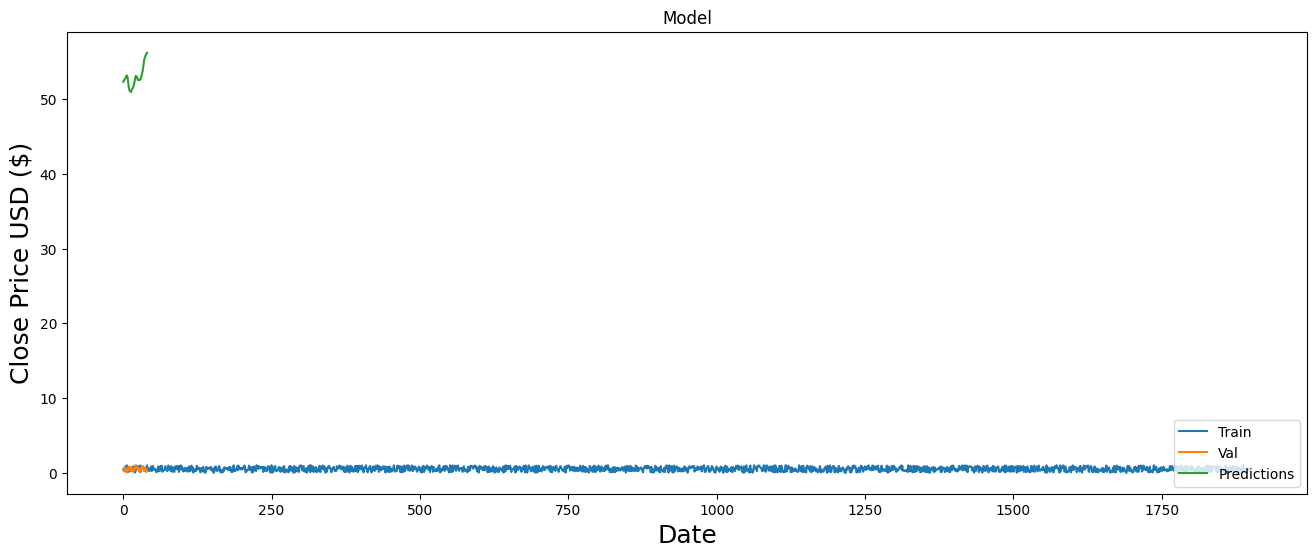

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert train and valid arrays to DataFrames
train = pd.DataFrame(train, columns=['Close'])
valid = pd.DataFrame(valid[:predictions.shape[0]], columns=['Close'])

# Add 'Predictions' column to valid DataFrame
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [18]:
# Show the valid and predicted prices
valid

,Close,Predictions
0,0.384258,52.329556
1,0.205155,52.476414
2,0.709083,52.586960
3,0.768643,52.734650
4,0.199361,52.847950
5,0.058003,53.083103
6,0.256734,53.178978
7,0.117883,53.035015
8,0.731633,52.409630
9,0.423441,51.769096
